<a href="https://colab.research.google.com/github/xenonthesigma/skill/blob/main/skill_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**experiment 1**: loading dataset obtained from uciml

In [75]:
from google.colab import files
files.upload()


Saving winequality-red.csv to winequality-red (2).csv
Saving winequality-white.csv to winequality-white (2).csv


{'winequality-red (2).csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.

# **import necessary libraries**
we need these libraries for preprocessing(encoding, scaling, train test split, etc)


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#**experiment 1: concatenation of dfs**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


red_wine = pd.read_csv('winequality-red.csv', delimiter = ';')
red_wine['type']='red'
white_wine = pd.read_csv('winequality-white.csv', delimiter = ';')
white_wine['type']='white'
dfs = [red_wine, white_wine]
merged = pd.concat(dfs)
merged.dropna()
merged
merged.info()
merged.isna().sum()
merged.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

#**scatter plot**
uses dots to describe the target variable (here, white wine or red wine)
red dots are red wine, white dots are white wine


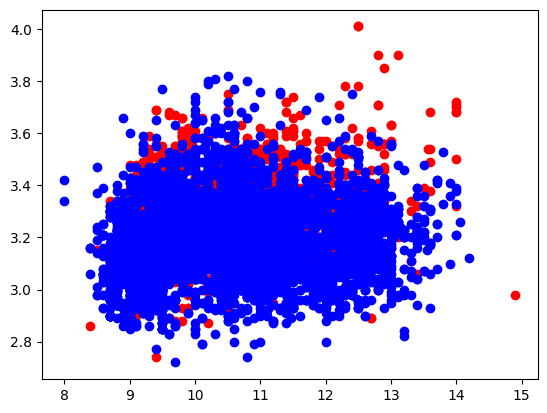

In [78]:
df1 = pd.read_csv('winequality-red.csv', delimiter = ';')
df1['type'] = 'red'
df2 = pd.read_csv('winequality-white.csv',delimiter = ';')
df2['type'] = 'white'
plt.scatter(df1['alcohol'],df1['pH'] ,color = 'red', label = 'red wine')
plt.scatter(df2['alcohol'],df2['pH'] ,color = 'blue', label = 'white wine')

plt.show()


#**experiment 3: applying encoding techniques on dataset**
**Label Encoding & Train Test Split**

**label encoding**: to represent categorical variables as numbers for dataset processing and accurate predictions.

**train test split**: splits the dataset into 2 parts; to train the model on one part and test the model on the other part.
standard train test splits are 80/20, 75/25, 70/30

In [79]:
#encoding
label_encoder = preprocessing.LabelEncoder()

merged['type'] = label_encoder.fit_transform(merged['type'])

#train test split

X = merged.drop(['type'], axis=1)
y = merged['type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**experiment 4: normalizing, scaling and balancing dataset**
**Removing outliers & Visualization**

outliers are anomalies in a dataset. in simpler words, values that are significantly different from other data points. this may be due to a variability in the measurement or a result of experimental error

we use 2 methods to effectively remove outliers:
1. **z-score method**:

  Tells how many standard deviations away a data point is from the mean.
  If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points.

2. **iqr method (Interquartile Range)**:

  set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3.



In [80]:
#1. IQR method for outlier removal

def remove_outliers_iqr(df, column):

    #calculate iqr, lower and upper bound
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    #remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df

columns_of_interest = ['alcohol', 'pH', 'quality', 'residual sugar', 'chlorides',
                       'free sulfur dioxide', 'total sulfur dioxide', 'density',
                       'sulphates', 'fixed acidity', 'volatile acidity', 'citric acid']

for column in columns_of_interest:
    merged = remove_outliers_iqr(merged, column)



#2. Z-SCORE for removing remaining outliers

def remove_outliers_zscore(df, column):

    z_score = np.abs((df[column] - df[column].mean()) / df[column].std())
    df = df[z_score < 3]
    return df

columns_of_interest = ['alcohol', 'pH', 'quality', 'residual sugar', 'chlorides',
                       'free sulfur dioxide', 'total sulfur dioxide', 'density',
                       'sulphates', 'fixed acidity', 'volatile acidity', 'citric acid']

for column in columns_of_interest:
    merged = remove_outliers_zscore(merged, column)



**scaling**: transforming data values to a specific range or distribution, to ensure features have similar scales and improve model performance, especially for algorithms sensitive to feature ranges.

1. standard scaling: centers the data around 0.
2. min-max scaling: maps data between -1 and +1.

In [103]:
#standard scaler
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()
X_StdScaled = StdScaler.fit_transform(X)
X_StdScaled

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [104]:
#min-max scaler
from sklearn.preprocessing import MinMaxScaler
MMScaler = MinMaxScaler()
X_MMScaled = MMScaler.fit_transform(X)
X_MMScaled

array([[0.29752066, 0.41333333, 0.        , ..., 0.19101124, 0.20289855,
        0.33333333],
       [0.33057851, 0.53333333, 0.        , ..., 0.25842697, 0.26086957,
        0.33333333],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.24157303, 0.26086957,
        0.33333333],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.13483146, 0.20289855,
        0.5       ],
       [0.14049587, 0.14      , 0.18072289, ..., 0.08988764, 0.69565217,
        0.66666667],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.05617978, 0.55072464,
        0.5       ]])

#**experiment 5 & 6: visualization using matplotlib library - part 1 & 2**
**visualization**:

used to visualise our model's results, to convey business insights visually.

<class 'pandas.core.frame.DataFrame'>
Index: 4478 entries, 9 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4478 non-null   float64
 1   volatile acidity      4478 non-null   float64
 2   citric acid           4478 non-null   float64
 3   residual sugar        4478 non-null   float64
 4   chlorides             4478 non-null   float64
 5   free sulfur dioxide   4478 non-null   float64
 6   total sulfur dioxide  4478 non-null   float64
 7   density               4478 non-null   float64
 8   pH                    4478 non-null   float64
 9   sulphates             4478 non-null   float64
 10  alcohol               4478 non-null   float64
 11  quality               4478 non-null   int64  
 12  type                  4478 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 489.8 KB


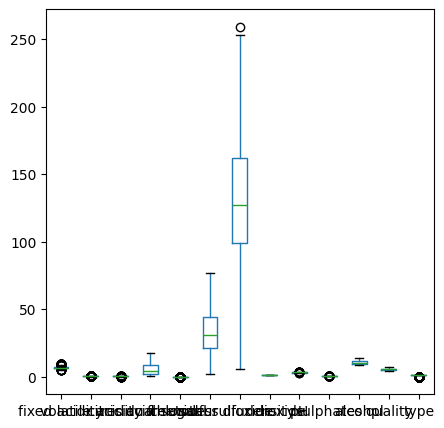

In [81]:
merged.boxplot(grid=False, figsize = (5,5))
merged.info()


#data visualization
#1. box plot
#2. bar graph
#3. line chart
#4. pie chart

([<matplotlib.patches.Wedge at 0x7d4d62261850>,
 [Text(-0.3400654734534835, -1.046114464943898, '1'),
  Text(0.3400656314123692, 1.0461144135954283, '0')],
 [Text(-0.18549025824735463, -0.5706078899693989, '90.0%'),
  Text(0.1854903444067468, 0.5706078619611427, '10.0%')])

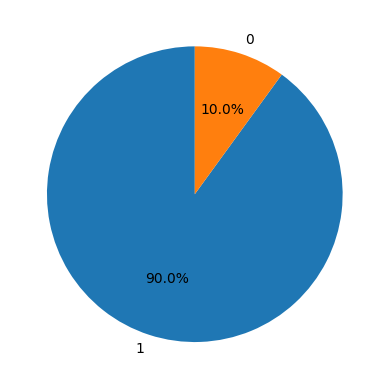

In [82]:
plt.pie(merged['type'].value_counts(), labels = merged['type'].value_counts().index,autopct='%1.1f%%', startangle=90)

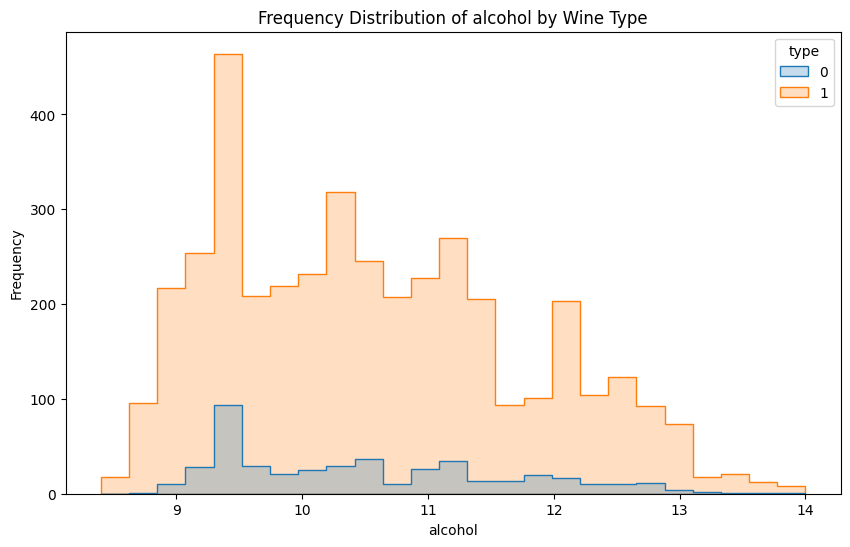

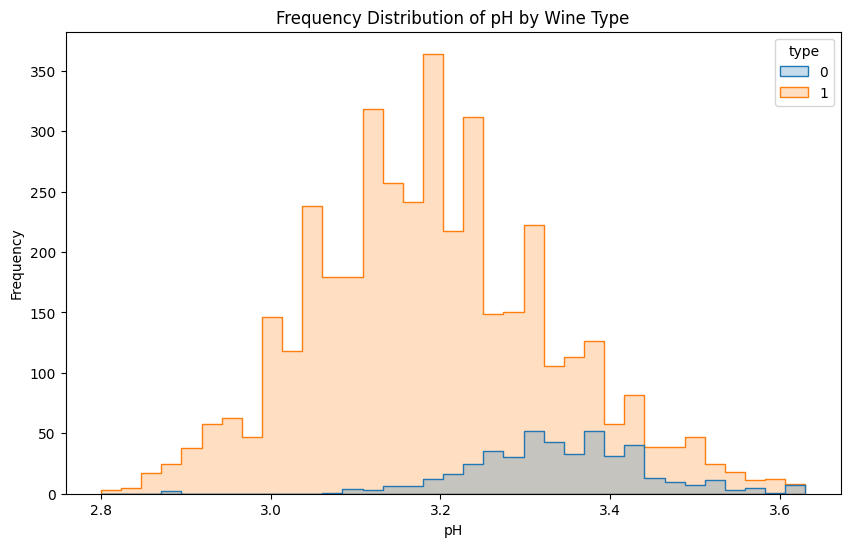

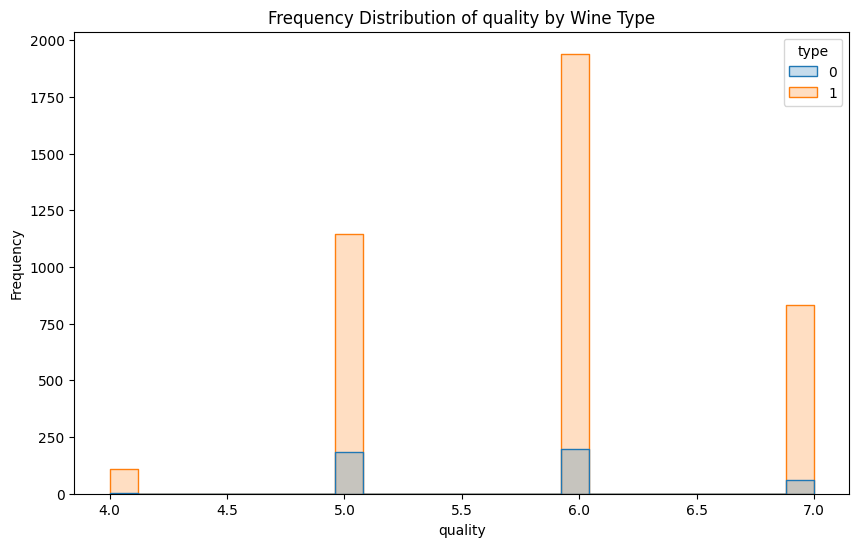

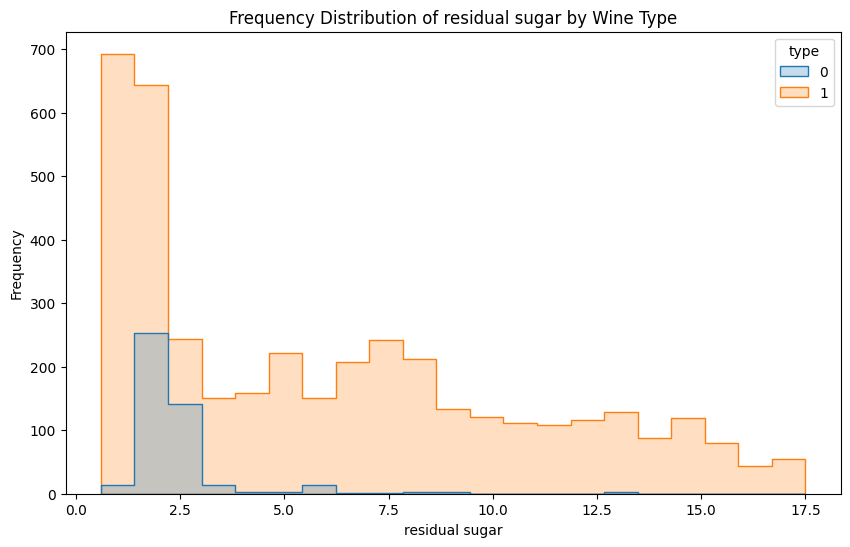

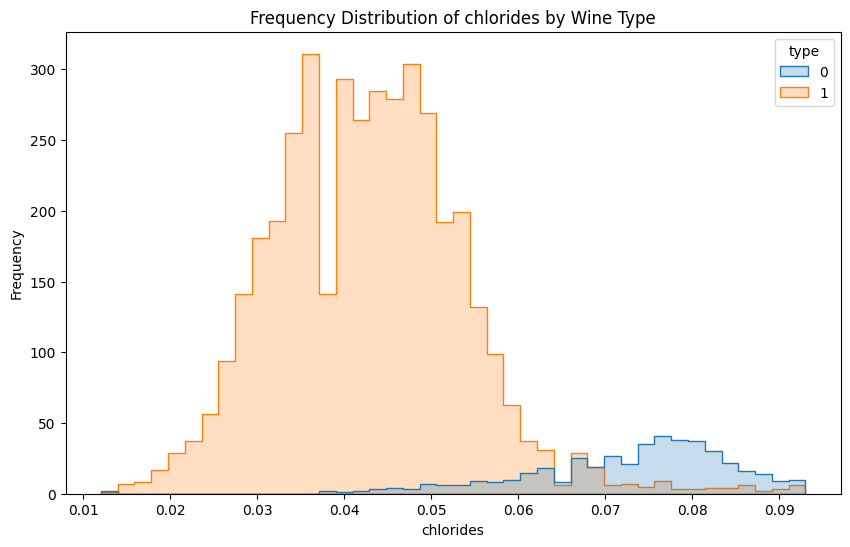

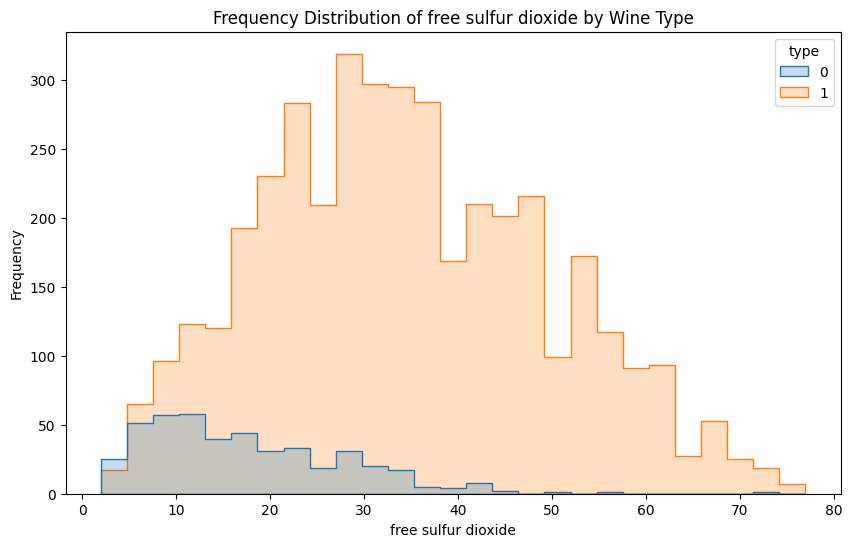

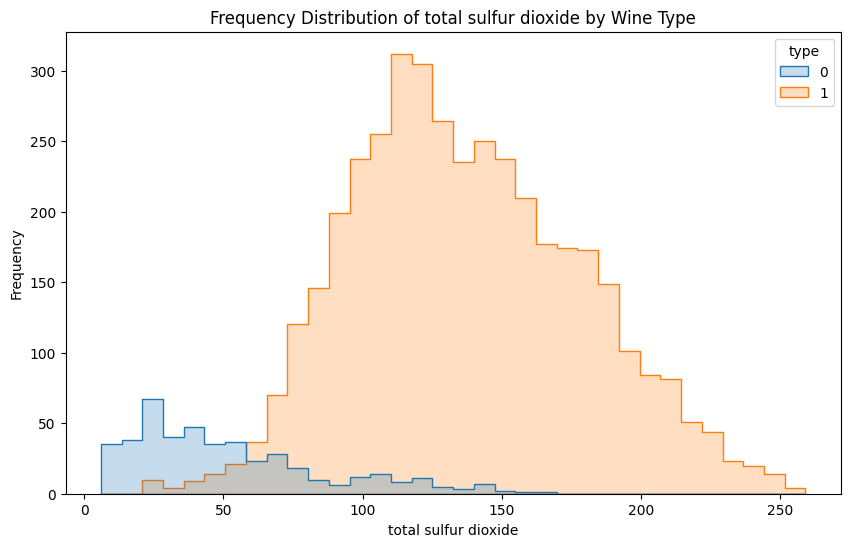

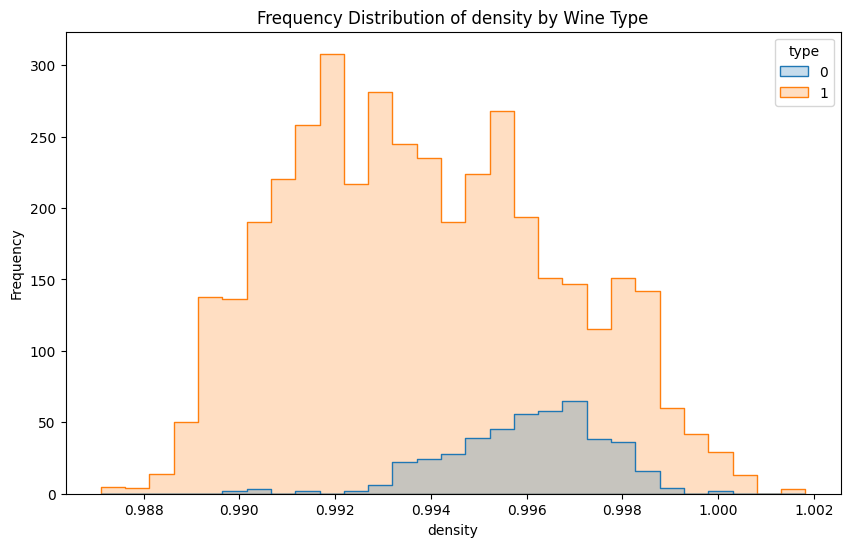

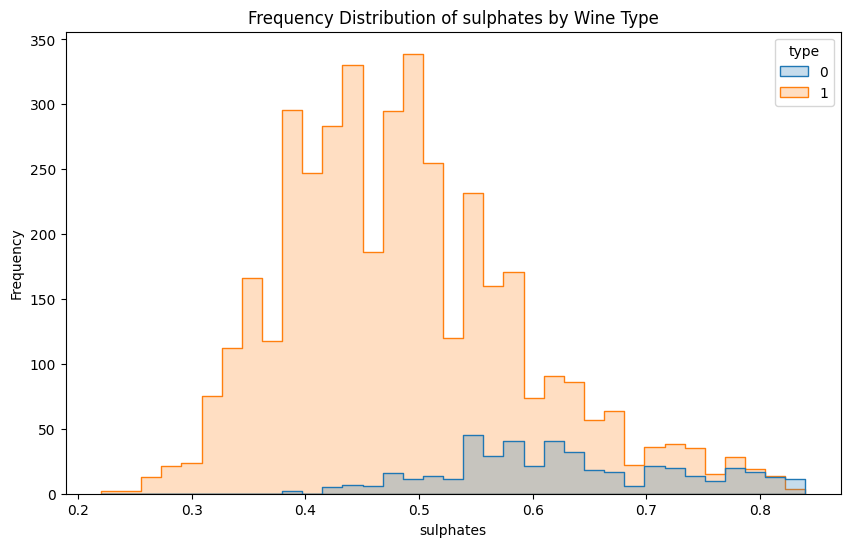

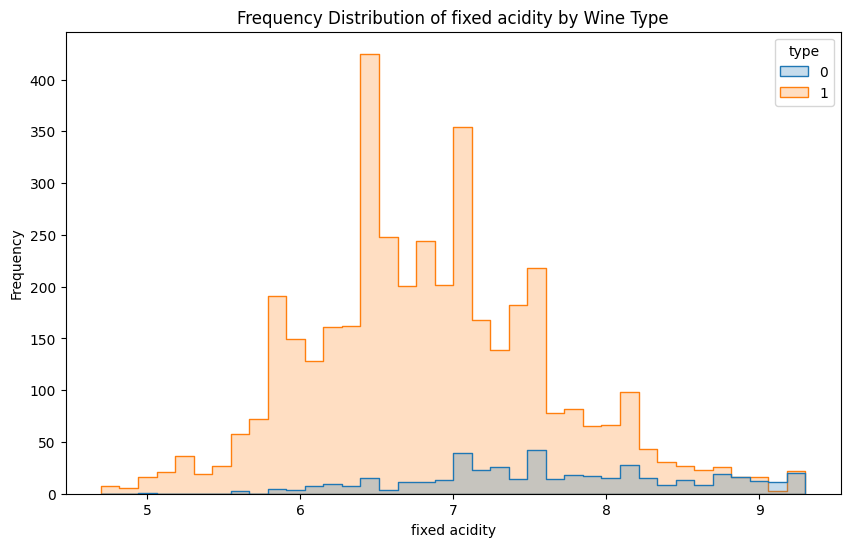

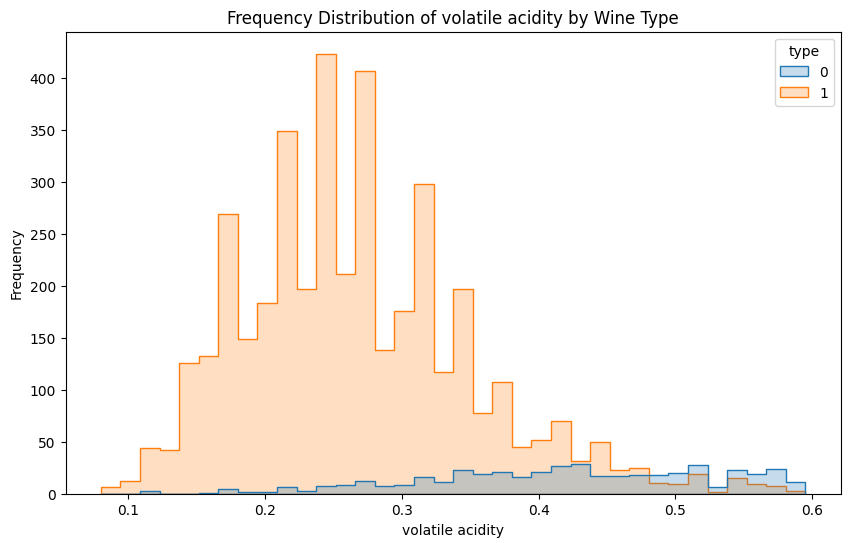

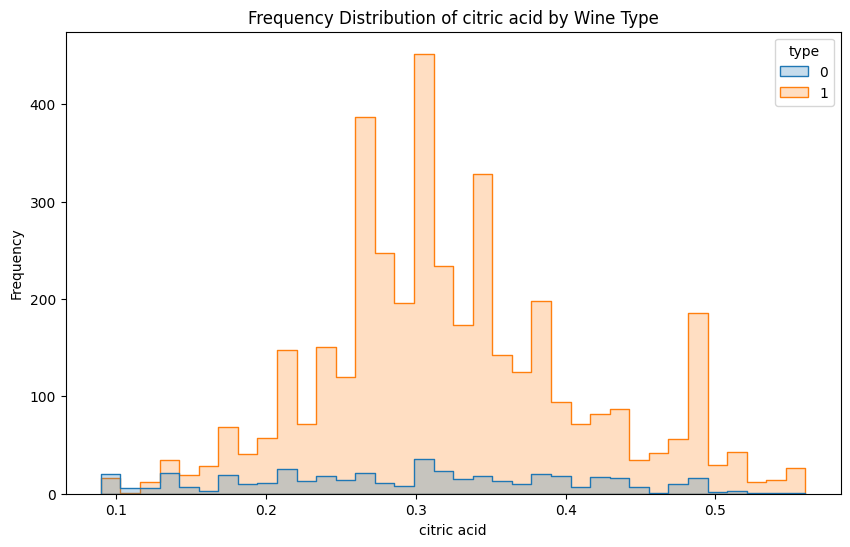

<bound method hist_frame of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5              0.50         0.36             6.1      0.071   
11              7.5              0.50         0.36             6.1      0.071   
16              8.5              0.28         0.56             1.8      0.092   
20              8.9              0.22         0.48             1.8      0.077   
21              7.6              0.39         0.31             2.3      0.082   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
9                    17.0                 102.0  0.99780  3.35       0.80   
11                   17.0                 102.0  0.99780  3.35       0.80   
16                   35.0                 103.0  0.99690  3.30       0.75   
20                   29.0                  60.0  0.99680  3.39       0.53   
21                   23.0                  71.0  0.99820  3.52       0.65   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  type  
9        10.5        5     0  
11       10.5        5     0  
16       10.5        7     0  
20        9.4        6     0  
21        9.7        5     0  
...       ...      ...   ...  
4893     11.2        6     1  
4894      9.6        5     1  
4895      9.4        6     1  
4896     12.8        7     1  
4897     11.8        6     1  

[4478 rows x 13 columns]>

In [83]:
for feature in columns_of_interest:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.histplot(data=merged, x=feature, hue='type', element='step', common_norm=False)
    plt.title(f'Frequency Distribution of {feature} by Wine Type')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
merged.hist

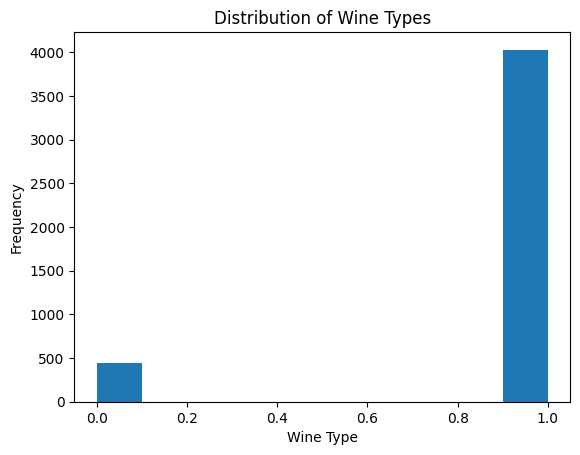

In [84]:
plt.hist(merged['type'], histtype = 'bar')
plt.xlabel('Wine Type')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Types')
plt.show()

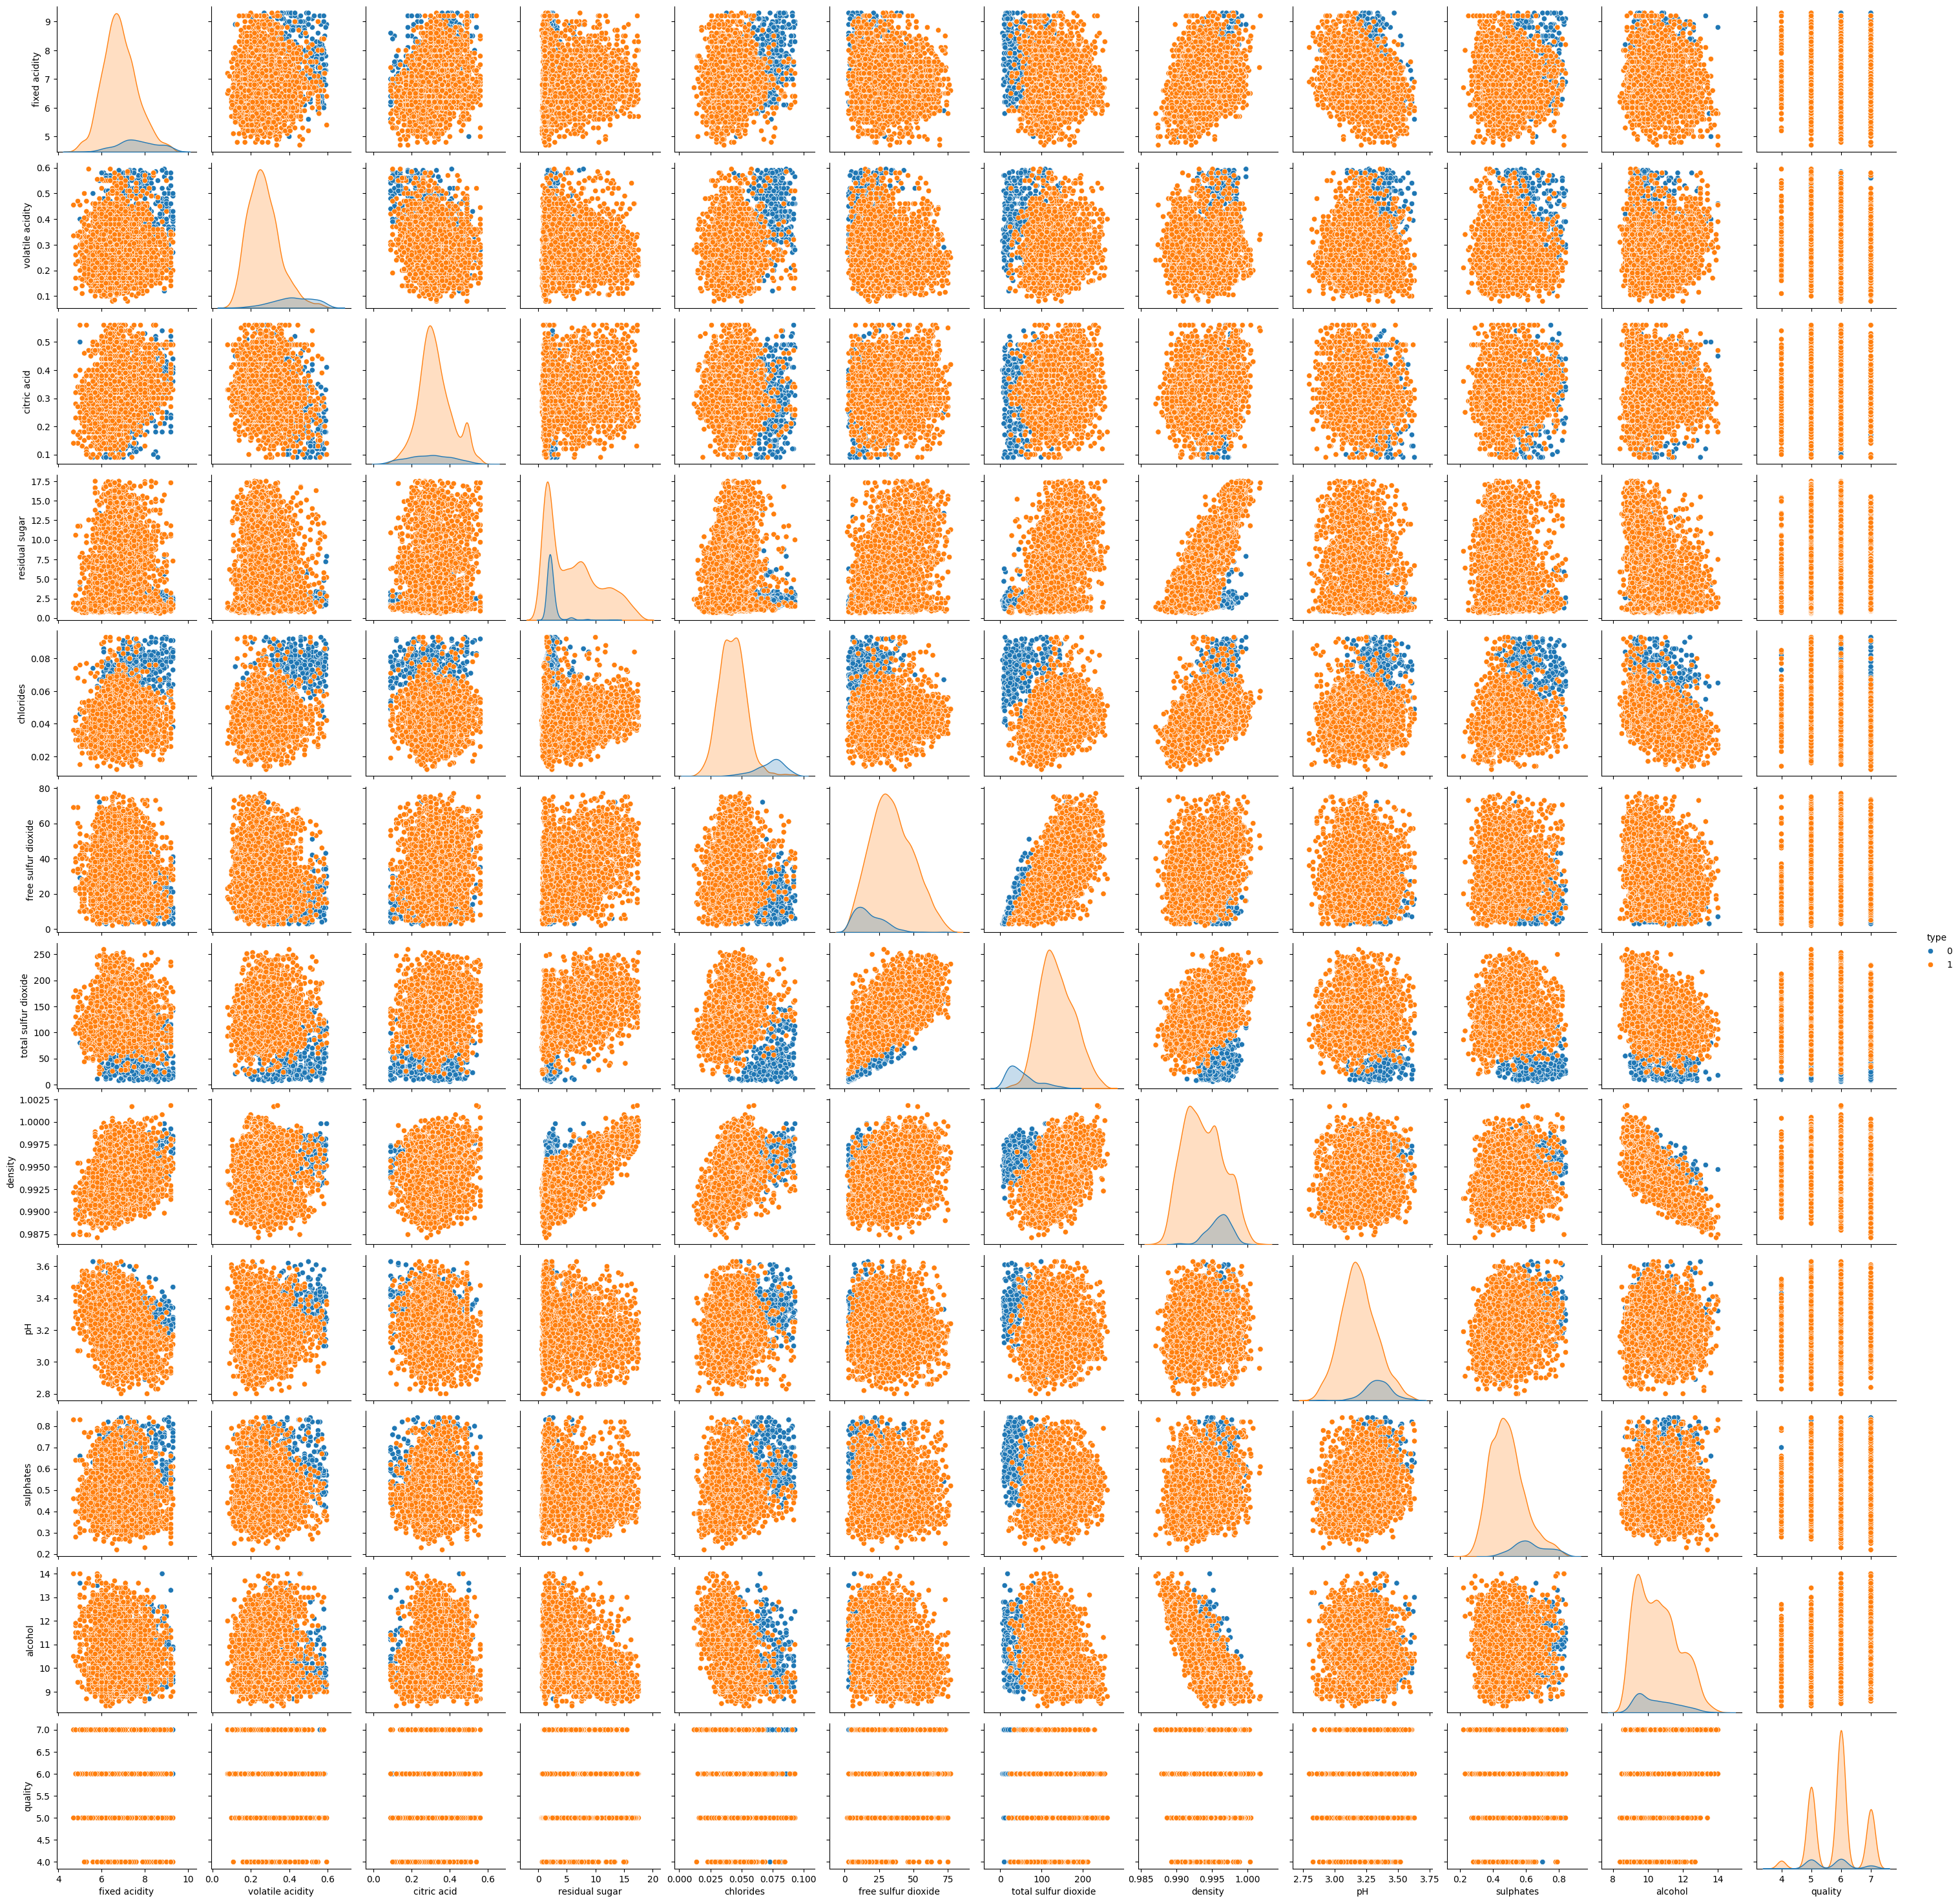

In [85]:
#pairplot
sns.pairplot(merged, hue = 'type')

**correlation matrix**:

used to map relations between two features between a scale of -1 to 1. usually used to perform feature selction; if the relationship is greater than 0.5, it is a strong feature. if the relation is less than 0.5, it can be removed, effectively performing feature selection


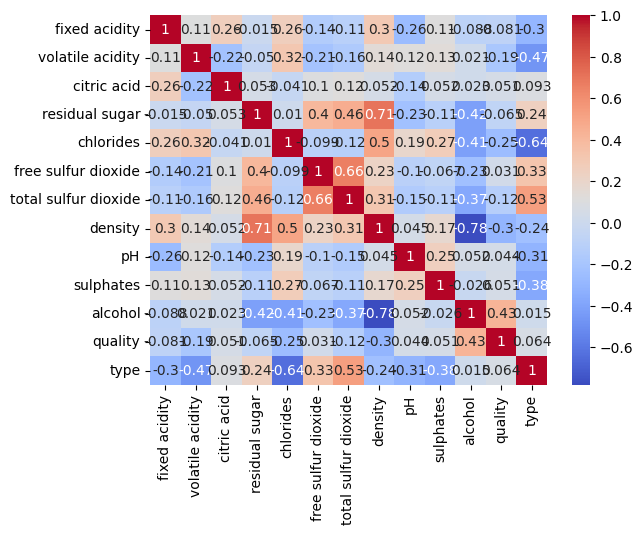

In [86]:
#correlation matrix
corr_matrix = merged.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# **experiment 7&8**
filter feature selection:

-> 1. correlation coefficient: calculate the correlation of features with the target.

-> 2. chi-squared method

-> 3. fisher score

-> 4. information gain

wrapper methods:

-> 1. forward selection

-> 2. backward selection

-> 3. recursive elimination

wrapper method
embedded method

import necessary libraries

In [87]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

**filter methods**


top features with correlation > 0.2: Index(['total sulfur dioxide', 'volatile acidity', 'chlorides', 'sulphates',
       'fixed acidity', 'free sulfur dioxide', 'density', 'residual sugar',
       'pH'],
      dtype='object')


<Axes: xlabel='Correlation', ylabel='Feature'>

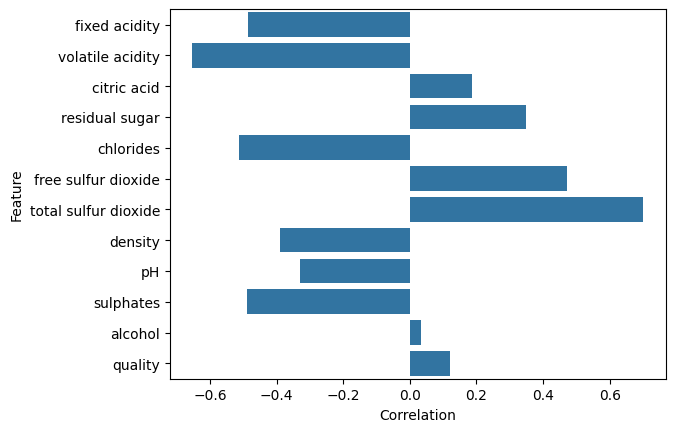

In [88]:
#1. correlation coefficient
correlation = X.corrwith(y)
selected_corr = correlation.abs().sort_values(ascending=False)
selected_corr = selected_corr[selected_corr > 0.2].dropna()
print("top features with correlation > 0.2:", selected_corr.index)

correlation_df = pd.DataFrame({'Feature': correlation.index, 'Correlation': correlation.values})
sns.barplot(x='Correlation', y='Feature', data=correlation_df, orient='h')

min-max scaling before chi square test: chi square test is sensitive to magnitudes

In [105]:

#2. chi-squared method
chi2_selector = SelectKBest(chi2, k=8)
chi2_selector.fit_transform(X_MMScaled, y)
chi2_selected_features = X.columns[chi2_selector.get_support()]
print("top 8 features with highest chi-squared score: ",chi2_selected_features)

chi2_df

top 8 features with highest chi-squared score:  Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates'],
      dtype='object')


feature         score
0         fixed acidity    358.497091
1      volatile acidity    221.064880
2           citric acid     15.118752
3        residual sugar   3287.056863
4             chlorides     37.398554
5   free sulfur dioxide  14913.554060
6  total sulfur dioxide  87946.248732
7             sulphates     64.271565

In [90]:
#3. information gain method
infogain_selector = SelectKBest(score_func = mutual_info_classif, k = 8)
infogain_selector.fit_transform(X, y)
infogain_selected_features = X.columns[infogain_selector.get_support()]
print("top 8 features with highest information gain: ",infogain_selected_features)

top 8 features with highest information gain:  Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates'],
      dtype='object')


In [91]:
#4. fisher score method
fisher_selector = SelectKBest(score_func = f_classif, k = 8)
fisher_selector.fit_transform(X, y)
fisher_selected_features = X.columns[fisher_selector.get_support()]
print("top 8 features with highest fisher score: ",fisher_selected_features)

top 8 features with highest fisher score:  Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates'],
      dtype='object')


**wrapper method**

In [96]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

def evaluate_model(X_train, X_test, y_train, y_test, feature_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {len(feature_names)} features: {acc:.4f}")
    return acc


forward_selector = SequentialFeatureSelector(model, n_features_to_select=8, direction='forward')
forward_selector.fit(X_train, y_train)
forward_selected_features = X_train.columns[forward_selector.get_support()]
print("\nTop 8 features (Forward Selection):", forward_selected_features.tolist())

# Train & evaluate Decision Tree with selected features
X_train_fs, X_test_fs = X_train[forward_selected_features], X_test[forward_selected_features]
forward_acc = evaluate_model(X_train_fs, X_test_fs, y_train, y_test, forward_selected_features)


Top 8 features (Forward Selection): ['fixed acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']
Accuracy with 8 features: 0.9846


In [97]:
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=True)

# **Baseline Model - Using All Features**
print("\n--- Baseline Model (All Features) ---")
baseline_acc = evaluate_model(X_train, X_test, y_train, y_test, X.columns)

selected_features = X.columns.tolist()
accuracies = [(len(selected_features), baseline_acc)]

while len(selected_features) > 8:
    least_important_feature = feature_importances.iloc[0]["Feature"]
    selected_features.remove(least_important_feature)

    X_train_filtered, X_test_filtered = X_train[selected_features], X_test[selected_features]
    acc = evaluate_model(X_train_filtered, X_test_filtered, y_train, y_test, selected_features)

    accuracies.append((len(selected_features), acc))

    feature_importances = feature_importances[feature_importances["Feature"] != least_important_feature]

print("\nTop 8 features selected via Backward Feature Elimination:", selected_features)



--- Baseline Model (All Features) ---
Accuracy with 12 features: 0.9815
Accuracy with 11 features: 0.9846
Accuracy with 10 features: 0.9815
Accuracy with 9 features: 0.9815
Accuracy with 8 features: 0.9769

Top 8 features selected via Backward Feature Elimination: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']


In [98]:
rfe_selector = RFE(estimator=model, n_features_to_select=8)  # Keep top 8 features
rfe_selector.fit(X_train, y_train)

selected_features = X.columns[rfe_selector.support_]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- RFE Feature Selection ---")
print(f"Top 8 features selected via RFE: {selected_features.tolist()}")
print(f"Model Accuracy with Selected Features: {accuracy:.4f}")



--- RFE Feature Selection ---
Top 8 features selected via RFE: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
Model Accuracy with Selected Features: 0.9792
